<a href="https://colab.research.google.com/github/sahilwasta28/Target-Customer-Prediction/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [ ]:
df=pd.read_csv("/content/cleaned_datasett.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1,1,no,0
3,35.0,8,1,3,1,5,1,139.0,1,1,no,0
4,28.0,8,3,3,1,5,1,217.0,1,1,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43182,51.0,5,1,3,3,17,4,640.5,3,1,yes,1
43183,70.5,10,2,1,3,17,4,456.0,2,1,yes,1
43184,70.5,10,1,2,3,17,4,640.5,5,4,yes,1
43185,57.0,1,1,2,2,17,4,508.0,4,1,no,0


# Feature and Target

In [ ]:
# X --> Feature y-- > Target

x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values

# Splitting

In [ ]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

In [ ]:
!pip install scikit-learn==1.2.2

# Balancing the data

In [ ]:
#Balancing the data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [ ]:
print(len(x_train_smt))
print(len(y_train_smt))

52666
52666


# Scaling the data

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# After fitting the scaler to the training data
x_train_mean = scaler.mean_
x_train_std = np.sqrt(scaler.var_)  # Standard deviation is the square root of the variance

# Print the mean and standard deviation of each feature
print("Mean of each feature:\n", x_train_mean)
print("Standard deviation of each feature:\n", x_train_std)

Mean of each feature:
 [ 40.99591071   5.63737903   1.74497158   2.21178122   2.53790445
  15.66012711   4.47941068 313.66541961   2.2318503    1.52084539]
Standard deviation of each feature:
 [ 11.2307981    2.9028902    0.85462595   0.62489413   0.7745308
   8.28235593   2.96868901 209.37126653   1.45229787   0.89786289]


In [ ]:
print("Data type of x_train_mean:", x_train_mean.dtype)
print("Data type of x_train_std:", x_train_std.dtype)

Data type of x_train_mean: float64
Data type of x_train_std: float64


# **Modeling**

## **Logistic Regression**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

class LogisticRegression():
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(x, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(x.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, x):
        linear_pred = np.dot(x, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred


x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y = df['target'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

clf = LogisticRegression(lr=0.01)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

In [ ]:
log_acc = accuracy(y_pred, y_test)
print("Accuracy for Logistic Regression : ",round(log_acc,3))

# ANSI escape code for bold text
bold_text = "\033[1m"

# ANSI escape code to reset text formatting
reset_text_format = "\033[0m"

# Convert AUROC score to percentage
auroc_percentage = log_acc * 100

print(bold_text + "Accuracy for Logistic Regression in percentage : {:.2f}%".format(auroc_percentage) + reset_text_format)

Accuracy for Logistic Regression :  0.885
Accuracy for Logistic Regression in percentage : 88.53%


## Classification Report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming x and y are your features and labels respectively
x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y = df['target'].values

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Train your Logistic Regression model (clf) here

# Make predictions
y_pred = clf.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report for Logistic Regression:")
print(report)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7645
           1       1.00      0.00      0.00       993

    accuracy                           0.89      8638
   macro avg       0.94      0.50      0.47      8638
weighted avg       0.90      0.89      0.83      8638



## Confusion Matrix

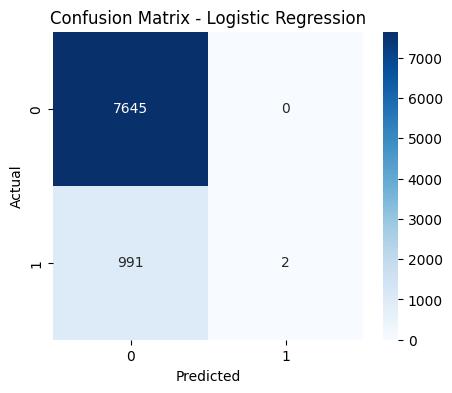

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# **Prediction**

In [ ]:
import numpy as np

# Define the new customer data
new_customer_data = {
    'age': 35,
    'job': 'management',
    'marital': 'married',
    'education_qual': 'tertiary',
    'call_type': 'cellular',
    'day': 15,
    'mon': 'may',
    'dur': 300,
    'num_calls': 2,
    'prev_outcome': 'unknown'
}

# Function to preprocess categorical data
def preprocess_categorical(data):
    # Mapping for job category
    job_mapping = {'management': 0, 'blue-collar': 1, 'technician': 2, 'admin.': 3, 'services': 4,
                   'retired': 5, 'self-employed': 6, 'entrepreneur': 7, 'unemployed': 8, 'housemaid': 9, 'student': 10}
    # Mapping for marital status category
    marital_mapping = {'married': 0, 'single': 1, 'divorced': 2}
    # Mapping for education category
    education_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
    # Mapping for call type category
    call_type_mapping = {'cellular': 0, 'unknown': 1, 'telephone': 2}
    # Mapping for month category
    month_mapping = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}
    # Mapping for previous outcome category
    prev_outcome_mapping = {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}

    # Apply mappings to the data
    data['job'] = job_mapping[data['job']]
    data['marital'] = marital_mapping[data['marital']]
    data['education_qual'] = education_mapping[data['education_qual']]
    data['call_type'] = call_type_mapping[data['call_type']]
    data['mon'] = month_mapping[data['mon']]
    data['prev_outcome'] = prev_outcome_mapping[data['prev_outcome']]

    return data

# Preprocess the new customer data
new_customer_data = preprocess_categorical(new_customer_data)

# Convert the dictionary to a numpy array
new_input_data = np.array(list(new_customer_data.values()))

# Make prediction using the trained model
prediction = clf.predict(new_input_data.reshape(1, -1))

# Print the result
if prediction[0] == 0:
    print("The Customer is predicted to not Subscribe to Insurance.")
else:
    print("The Customer is predicted to Subscribe to Insurance.")



The Customer is predicted to not Subscribe to Insurance.
